# ***Binary Classification Problem***

### ***Data Preparation***

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("heart_disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [3]:
df.isna().sum()
df.isna().sum().sum()

6

In [4]:
df = df.dropna()

In [5]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=43, stratify=y
)

### ***Model 1: KNN***

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [27]:
k_values = [3, 4, 5, 6, 7, 8, 9, 10]
cv_scores = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(
        model,
        X_train,
        y_train,
        cv = 5, # we are using 5-folds
        scoring="accuracy"
    )
    cv_scores.append(scores.mean())
    print(f"number of neighbors={k}, CV accuracy={scores.mean():.4f}")

number of neighbors=3, CV accuracy=0.4871
number of neighbors=4, CV accuracy=0.4832
number of neighbors=5, CV accuracy=0.4907
number of neighbors=6, CV accuracy=0.5020
number of neighbors=7, CV accuracy=0.5056
number of neighbors=8, CV accuracy=0.5094
number of neighbors=9, CV accuracy=0.5094
number of neighbors=10, CV accuracy=0.5208


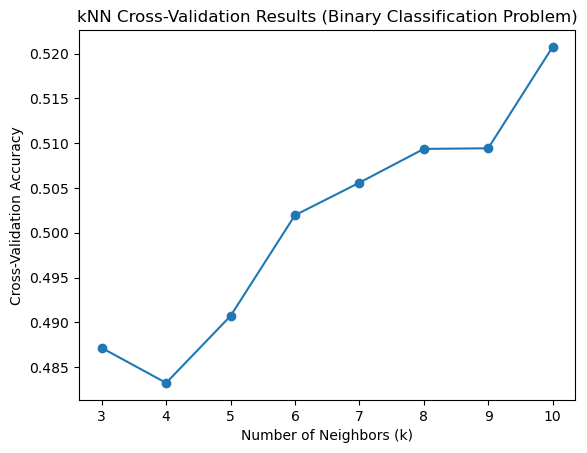

In [8]:
import matplotlib.pyplot as plt

plt.plot(k_values, cv_scores, marker='o')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Cross-Validation Accuracy")
plt.title("kNN Cross-Validation Results (Binary Classification Problem)")
plt.show()

we could see that the k value that has the best accuracy is k = 10.

In [9]:
best_k = k_values[np.argmax(cv_scores)]
best_knn = KNeighborsClassifier(n_neighbors=best_k)

best_knn.fit(X_train, y_train)
best_k

10

In [10]:
from sklearn.metrics import accuracy_score
import time

start_train = time.time()
best_knn.fit(X_train, y_train)
end_train = time.time()

start_pred = time.time()
y_pred = best_knn.predict(X_test)
end_pred = time.time()

print("Training time (s):", end_train - start_train)
print("Prediction time (s):", end_pred - start_pred)

acc = accuracy_score(y_test, y_pred)

print("Best k value:", best_k)
print("Test (Validation set) accuracy of the KNN model with k =", best_k, ":", acc)


Training time (s): 0.002584695816040039
Prediction time (s): 0.004651069641113281
Best k value: 10
Test (Validation set) accuracy of the KNN model with k = 10 : 0.5666666666666667


### ***Model 2: ANN***

In [11]:
hidden_sizes = [5, 10, 20, 30, 50]

For the artificial neural network, we fixed the architecture to a single hidden layer and tuned the number of neurons in that layer using 5-fold cross-validation.

In [30]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

cv_scores_ann = []

for h in hidden_sizes:
    ann_pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("mlp", MLPClassifier(
            hidden_layer_sizes=(h,),
            max_iter=1000,
            random_state=42
        ))
    ])
    
    scores = cross_val_score(
        ann_pipeline,
        X_train,
        y_train,
        cv=5,  # we are using 5-folds
        scoring="accuracy"
    )
    cv_scores_ann.append(scores.mean())
    print(f"hidden layer sizes=({h},), CV accuracy={scores.mean():.4f}")

/Users/christinayang/anaconda3/envs/cse217a/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/christinayang/anaconda3/envs/cse217a/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/christinayang/anaconda3/envs/cse217a/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


hidden layer sizes=(5,), CV accuracy=0.5508


/Users/christinayang/anaconda3/envs/cse217a/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/christinayang/anaconda3/envs/cse217a/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/christinayang/anaconda3/envs/cse217a/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/christinayang/anaconda3/envs/cse217a/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the 

hidden layer sizes=(10,), CV accuracy=0.5396


/Users/christinayang/anaconda3/envs/cse217a/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/christinayang/anaconda3/envs/cse217a/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/christinayang/anaconda3/envs/cse217a/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/christinayang/anaconda3/envs/cse217a/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the 

hidden layer sizes=(20,), CV accuracy=0.5207


/Users/christinayang/anaconda3/envs/cse217a/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/christinayang/anaconda3/envs/cse217a/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/christinayang/anaconda3/envs/cse217a/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/christinayang/anaconda3/envs/cse217a/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the 

hidden layer sizes=(30,), CV accuracy=0.5321


/Users/christinayang/anaconda3/envs/cse217a/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/christinayang/anaconda3/envs/cse217a/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/christinayang/anaconda3/envs/cse217a/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/christinayang/anaconda3/envs/cse217a/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the 

hidden layer sizes=(50,), CV accuracy=0.5397


/Users/christinayang/anaconda3/envs/cse217a/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


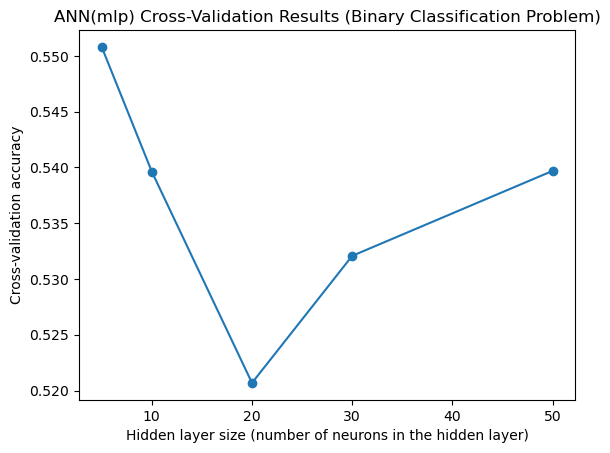

In [13]:
plt.plot(hidden_sizes, cv_scores_ann, marker='o')
plt.xlabel("Hidden layer size (number of neurons in the hidden layer)")
plt.ylabel("Cross-validation accuracy")
plt.title("ANN(mlp) Cross-Validation Results (Binary Classification Problem)")
plt.show()

based on the plot, we could see that the model with highest accuracy is with hidden layer size of 5 or 10. So we continue retrain our model with hidden size = 5.

In [14]:
best_h = hidden_sizes[np.argmax(cv_scores_ann)]
print("Best hidden size:", best_h)

best_ann = Pipeline([
    ("scaler", StandardScaler()),
    ("mlp", MLPClassifier(
        hidden_layer_sizes=(best_h,),
        max_iter=1000,
        random_state=42
    ))
])
best_h

Best hidden size: 5


5

In [15]:
start_train = time.time()
best_ann.fit(X_train, y_train)
end_train = time.time()

start_pred = time.time()
y_pred = best_ann.predict(X_test)
end_pred = time.time()

print("Training time (s):", end_train - start_train)
print("Prediction time (s):", end_pred - start_pred)

acc = accuracy_score(y_test, y_pred)

print("Best hideen layer size:", best_h)
print("Test (Validation set) accuracy of the ANN model with hideen layer size =", best_h, ":", acc)


Training time (s): 0.434434175491333
Prediction time (s): 0.0010859966278076172
Best hideen layer size: 5
Test (Validation set) accuracy of the ANN model with hideen layer size = 5 : 0.6


/Users/christinayang/anaconda3/envs/cse217a/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


### ***Model 3: Decision Tree***

In [16]:
depth_values = [2, 3, 4, 5, 6]

In [28]:
from sklearn.tree import DecisionTreeClassifier
cv_scores_dt = []

for d in depth_values:
    dt = DecisionTreeClassifier(
        max_depth=d,
        random_state=43
    )
    
    scores = cross_val_score(
        dt,
        X_train,
        y_train,
        cv=5, # again, we are still using 5-folds
        scoring="accuracy"
    )
    
    cv_scores_dt.append(scores.mean())
    print(f"max depth={d}, CV accuracy={scores.mean():.4f}")

max depth=2, CV accuracy=0.5581
max depth=3, CV accuracy=0.5619
max depth=4, CV accuracy=0.5360
max depth=5, CV accuracy=0.5546
max depth=6, CV accuracy=0.5395


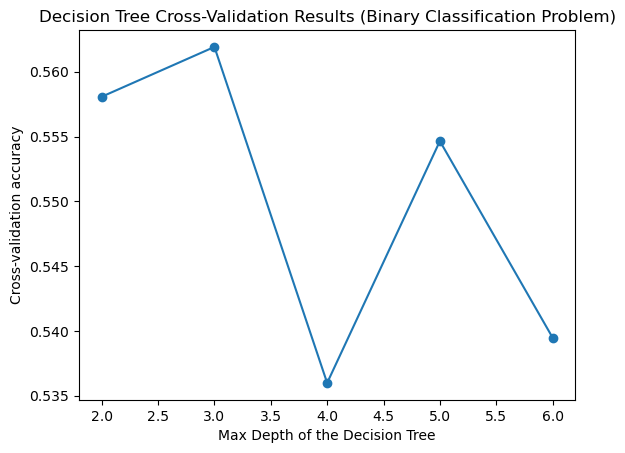

In [18]:
plt.plot(depth_values, cv_scores_dt, marker='o')
plt.xlabel("Max Depth of the Decision Tree")
plt.ylabel("Cross-validation accuracy")
plt.title("Decision Tree Cross-Validation Results (Binary Classification Problem)")
plt.show()

from the plot, we could see the decision tree with a depth of 3 achieves the highest cross validation accuracy.

In [19]:
best_depth = depth_values[np.argmax(cv_scores_dt)]
print("Best max_depth:", best_depth)

best_dt = DecisionTreeClassifier(
    max_depth=best_depth,
    random_state=43
)
best_depth

Best max_depth: 3


3

In [20]:
start_train = time.time()
best_dt.fit(X_train, y_train)
end_train = time.time()

start_pred = time.time()
y_pred = best_dt.predict(X_test)
end_pred = time.time()

print("Training time (s):", end_train - start_train)
print("Prediction time (s):", end_pred - start_pred)

acc = accuracy_score(y_test, y_pred)

print("Best k value:", best_depth)
print("Test (Validation set) accuracy of the decision tree with a depth =", best_depth, ":", acc)


Training time (s): 0.0038909912109375
Prediction time (s): 0.0010743141174316406
Best k value: 3
Test (Validation set) accuracy of the decision tree with a depth = 3 : 0.4666666666666667


### ***Model 4: Decision Tree***

In [21]:
n_estimators_list = [50, 100, 150, 200, 300]

In [29]:
from sklearn.ensemble import RandomForestClassifier
cv_scores_rf = []

for n in n_estimators_list:
    rf = RandomForestClassifier(
        n_estimators=n,
        random_state=43,
    )
    
    scores = cross_val_score(
        rf,
        X_train,
        y_train,
        cv=5,
        scoring="accuracy"
    )
    
    cv_scores_rf.append(scores.mean())
    print(f"number of estimators={n}, CV accuracy={scores.mean():.4f}")


number of estimators=50, CV accuracy=0.5620
number of estimators=100, CV accuracy=0.5769
number of estimators=150, CV accuracy=0.5694
number of estimators=200, CV accuracy=0.5730
number of estimators=300, CV accuracy=0.5693


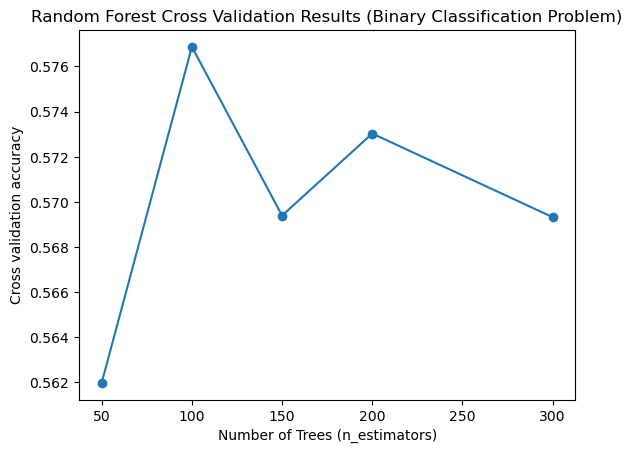

In [23]:
plt.plot(n_estimators_list, cv_scores_rf, marker='o')
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Cross validation accuracy")
plt.title("Random Forest Cross Validation Results (Binary Classification Problem)")
plt.show()

we see the 100 trees forest receives the highest cross validation accuracy.

In [24]:
best_n = n_estimators_list[np.argmax(cv_scores_rf)]

best_rf = RandomForestClassifier(
    n_estimators=best_n,
    random_state=43,
)

best_n

100

In [25]:
start_train = time.time()
best_rf.fit(X_train, y_train)
end_train = time.time()

start_pred = time.time()
y_pred = best_rf.predict(X_test)
end_pred = time.time()

print("Training time (s):", end_train - start_train)
print("Prediction time (s):", end_pred - start_pred)

acc = accuracy_score(y_test, y_pred)

print("Best k value:", best_n)
print("Test (Validation set) accuracy of the random forest with number of decision trees inside =", best_n, ":", acc)


Training time (s): 0.136152982711792
Prediction time (s): 0.006623029708862305
Best k value: 100
Test (Validation set) accuracy of the random forest with number of decision trees inside = 100 : 0.5333333333333333
